In [3]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_bsim = pandas.read_csv("bluesim_stats.csv")

In [4]:
df = pandas.read_csv("champsim_stats.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'champsim_stats.csv'

In [ ]:
# There is an issue with these traces - they have the same MKPI results no matter what predicor I use, including he hashed_perceptron, Bimodal, etc
df_filtered = df[~df["trace"].isin(["437.leslie3d-134B.champsimtrace.xz", "654.roms_s-1007B.champsimtrace.xz", "462.libquantum-714B.champsimtrace.xz", "410.bwaves-1963B.champsimtrace.xz","435.gromacs-111B.champsimtrace.xz"])]
df_filtered = df_filtered.merge(df_filtered[df_filtered["predictor"] == "Tage"][["trace","rate","mkpi"]], on="trace", suffixes=("_predictor", "_Tage"))
df_filtered["rate"] = df_filtered["rate_predictor"] / df_filtered["rate_Tage"]
df_filtered["mkpi"] = df_filtered["mkpi_predictor"] / df_filtered["mkpi_Tage"]
df_filtered = df_filtered.sort_values("trace")
df_filtered

,predictor,trace,rate_predictor,mkpi_predictor,rate_Tage,mkpi_Tage,rate,mkpi
0,Tage,400.perlbench-41B.champsimtrace.xz,2.14,3.43,2.14,3.43,1.000000,1.000000
3,Tournament,400.perlbench-41B.champsimtrace.xz,4.28,6.86,2.14,3.43,2.000000,2.000000
56,Tournament_Scaled,400.perlbench-41B.champsimtrace.xz,3.75,6.00,2.14,3.43,1.752336,1.749271
1,Batage_non_cat,400.perlbench-41B.champsimtrace.xz,2.11,3.42,2.14,3.43,0.985981,0.997085
2,Batage,400.perlbench-41B.champsimtrace.xz,2.11,3.38,2.14,3.43,0.985981,0.985423
...,...,...,...,...,...,...,...,...
54,Tage,nodeapp-nodeapp-small.champsim.trace.gz,8.18,11.50,8.18,11.50,1.000000,1.000000
55,Tournament,nodeapp-nodeapp-small.champsim.trace.gz,15.70,22.10,8.18,11.50,1.919315,1.921739
69,Tournament_Scaled,whiskey.426708.champsim.trace.gz,5.40,8.57,4.44,7.04,1.216216,1.217330
50,Tage,whiskey.426708.champsim.trace.gz,4.44,7.04,4.44,7.04,1.000000,1.000000


In [ ]:
df_filtered["trace"] = df_filtered["trace"].str.removesuffix(".champsimtrace.xz")
df_filtered["trace"] = df_filtered["trace"].str.removesuffix(".champsimtrace.x")
df_filtered["trace"] = df_filtered["trace"].str.removesuffix(".champsim.trace.gz")

In [ ]:
df_filtered[df_filtered["predictor"] == "Tournament_Scaled"]

,predictor,trace,rate_predictor,mkpi_predictor,rate_Tage,mkpi_Tage,rate,mkpi
56,Tournament_Scaled,400.perlbench-41B,3.75,6.0000,2.140,3.4300,1.752336,1.749271
61,Tournament_Scaled,401.bzip2-38B,10.20,7.3600,9.440,6.7500,1.080508,1.090370
59,Tournament_Scaled,403.gcc-17B,3.13,4.3900,1.210,1.7000,2.586777,2.582353
60,Tournament_Scaled,429.mcf-51B,6.03,13.4000,5.740,12.8000,1.050523,1.046875
63,Tournament_Scaled,435.gromacs-111B,7.82,4.5900,7.970,4.6800,0.981179,0.980769
57,Tournament_Scaled,445.gobmk-30B,13.10,20.2000,11.600,18.0000,1.129310,1.122222
64,Tournament_Scaled,458.sjeng-1088B,7.68,14.0000,4.470,8.1300,1.718121,1.722017
73,Tournament_Scaled,470.lbm-1274B,0.60,0.0505,0.939,0.0789,0.638978,0.640051
65,Tournament_Scaled,481.wrf-1170B,1.09,1.1600,0.409,0.4350,2.665037,2.666667
62,Tournament_Scaled,623.xalancbmk_s-10B,1.44,3.3900,0.905,2.1300,1.591160,1.591549


In [6]:
def bplot(label, name, ax):
  sns.barplot(data=df_filtered[df_filtered["predictor"].isin(["Tournament", "Tournament_Scaled"])], x="trace", y=label, hue="predictor", alpha=0.8, ax=ax)
  ax.axhline(y=1, color="red", linestyle="--", label='Tage')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
  ax.legend(prop={'size': 8})
  ax.set_xlabel("Trace")
  ax.set_ylabel(f"{name} scaled against Tage")
  ax.set_title(f"Tournament predictor {name} scaled against Tage")


<ipython-input-6-1a40b74b58b2>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
<ipython-input-6-1a40b74b58b2>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


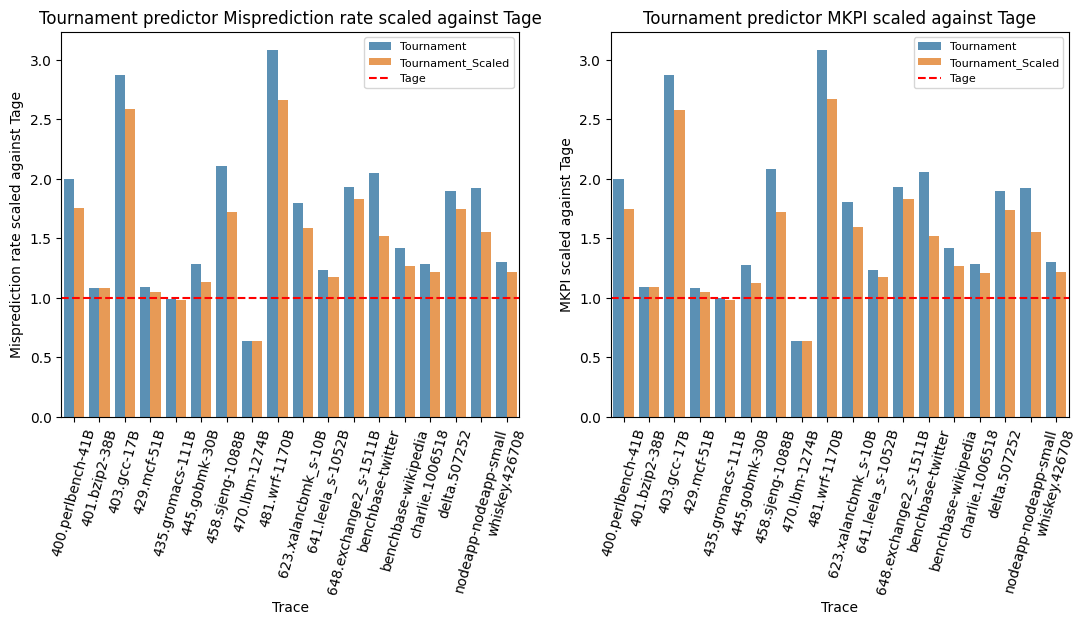

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
bplot("rate", "Misprediction rate",ax[0])
bplot("mkpi", "MKPI",ax[1])
plt.show()



Raw numbers

In [ ]:
def bplot_raw(label, name, ax):
  sns.barplot(data=df_filtered[df_filtered["predictor"].isin(["Tage","Tournament", "Tournament_Scaled"])], x="trace", y=f'{label}_predictor', hue="predictor", alpha=0.8, ax=ax)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
  ax.legend(prop={'size': 7})
  ax.set_xlabel("Trace")
  ax.set_ylabel(f"{name} comparison")
  ax.set_title(f"{name} comparison between predictors")

<ipython-input-8-af4f31db415c>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
<ipython-input-8-af4f31db415c>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


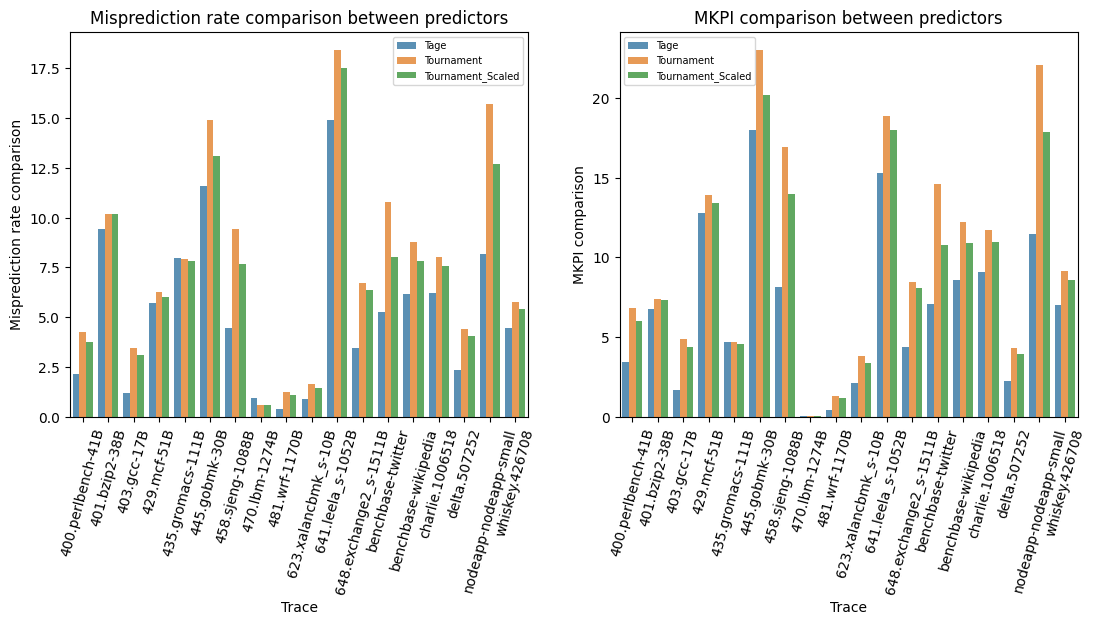

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(13,5))
bplot_raw("rate", "Misprediction rate",ax[0])
bplot_raw("mkpi", "MKPI",ax[1])
plt.show()

In [ ]:
print(df_filtered[df_filtered['predictor'] == 'Tournament']['mkpi'].mean(),
df_filtered[df_filtered['predictor'] == 'Tournament_Scaled']['mkpi'].mean())

1.6649643230088615 1.4838583943364905


In [7]:
df_bsim_coremark = df_bsim[df_bsim["benchmark"].isin(["coremark_1","coremark_2"])]
df_bsim_coremark.loc[df_bsim_coremark["predictor"] == "SingleCycleTage", "predictor"] = "TAGE"
df_bsim_coremark.loc[df_bsim_coremark["predictor"] == "TageStaged", "predictor"] = "Pipelined TAGE"
df_bsim_coremark['predictor'] = pandas.Categorical(df_bsim_coremark['predictor'], categories=["TAGE","Pipelined TAGE","Tournament","Tournament_Scaled"], ordered=True)
df_bsim_coremark

<ipython-input-7-0d504f16e054>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bsim_coremark['predictor'] = pandas.Categorical(df_bsim_coremark['predictor'], categories=["TAGE","Pipelined TAGE","Tournament","Tournament_Scaled"], ordered=True)


,predictor,benchmark,IPC,mkpi,cycles,branches,instructions,mispredictions,redirects,comment
0,Tournament_Scaled,coremark_1,0.580764,6.614940,1596942.0,163959.0,927446.0,6137.0,6135.0,NaN
1,Pipelined TAGE,coremark_1,0.592846,3.492387,1564396.0,147658.0,927446.0,2913.0,3239.0,NaN
2,Tournament,coremark_1,0.580643,6.797161,1597273.0,163931.0,927446.0,6306.0,6304.0,NaN
3,TAGE,coremark_1,0.591691,3.380251,1567450.0,147976.0,927446.0,3066.0,3135.0,NaN
4,Tournament,coremark_2,1.180939,15.406102,4832781.0,1005991.0,5707219.0,NaN,87926.0,NaN
5,TAGE,coremark_2,1.286055,9.355345,4437771.0,1005991.0,5707219.0,53172.0,53393.0,NaN
6,Pipelined TAGE,coremark_2,1.313062,8.548997,4346497.0,1005991.0,5707219.0,NaN,48791.0,NaN
7,Tournament_Scaled,coremark_2,1.200582,13.888375,4753709.0,1005991.0,5707219.0,NaN,79264.0,NaN


In [32]:
def bplot_coremark(label, name, ax):
  sns.color_palette("tab10")
  sns.barplot(data=df_bsim_coremark, x=f'{label}', y="benchmark", hue="predictor", alpha=0.8, ax=ax, orient='h', palette="bright")
  sns.despine(left=True, bottom=True)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
  ax.legend(prop={'size': 11})
  ax.set_xlabel(f'{label}')
  #ax.set_ylabel(f"{name} comparison")
  ax.set_title(f"{name} comparison between predictors")

<ipython-input-32-ebd6e7dafd63>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
<ipython-input-32-ebd6e7dafd63>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


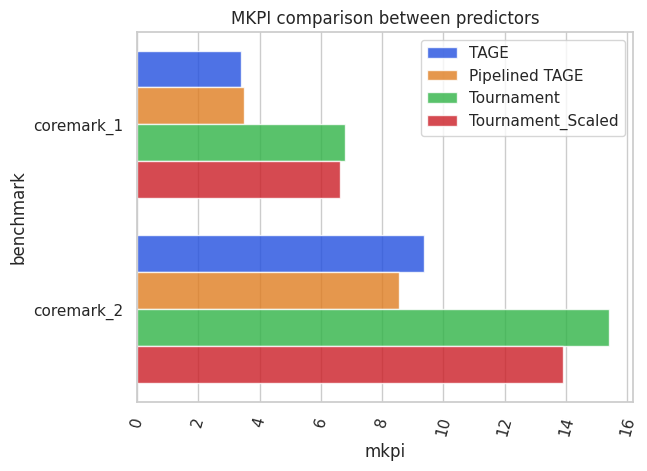

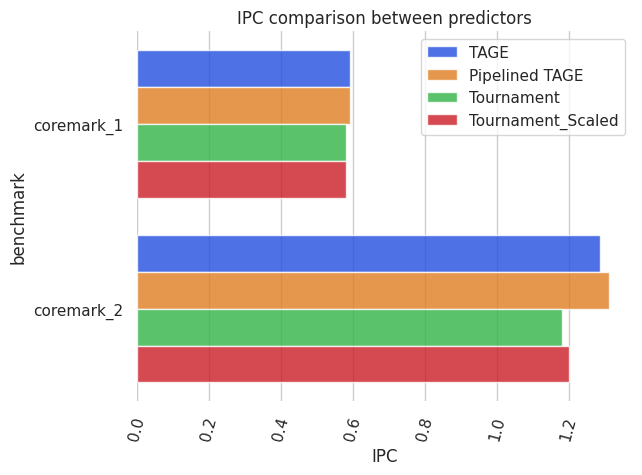

In [33]:
fig, ax = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)
bplot_coremark("mkpi", "MKPI", ax)
bplot_coremark("IPC", "IPC", ax2)
plt.show()


In [ ]:
df_synth = pandas.read_csv("Jenkins_TAGE - analysis_single2.csv")
df_synth.columns = df_synth.iloc[2]
df_synth = df_synth.iloc[3:].drop(columns=["archname", "instructions"])
df_synth = df_synth.rename(columns={"jal": "branch_redirect", "jalr": "jump_redirect"})

df_synth["branch_redirect"] = df_synth["branch_redirect"].str.replace("%", '').astype(float)
df_synth["cycles"] = df_synth["cycles"].str.replace("%", '').astype(float)
df_synth["branch_redirect"] = -df_synth["branch_redirect"]
df_synth["cycles"] = -df_synth["cycles"]

In [ ]:
df_synth

2,progname,cycles,time,redirect,branch,branch_redirect,jump_redirect,trap,load_wait,cap_load_tag_set,...,dcache_load_miss_wait,dcache_store,dcache_store_miss,llcache_load_miss,llcache_load_miss_wait,tagcache_load,tagcache_load_miss,tagcache_store,tagcache_store_miss,tagcache_evict
3,400.perlbench,3.58,-3.58%,-100.00%,-0.04%,54.95,-7.18%,-2.85%,26.17%,-1.00%,...,77.70%,-5.64%,0.38%,-8.98%,-7.75%,#DIV/0!,#DIV/0!,-1.78%,#DIV/0!,#DIV/0!
4,403.gcc,8.92,-8.91%,-100.00%,-0.11%,42.85,-12.48%,-8.58%,1.01%,-2.43%,...,4.55%,-2.06%,-4.62%,-15.50%,-14.12%,#DIV/0!,#DIV/0!,-3.03%,#DIV/0!,#DIV/0!
5,429.mcf,-2.93,2.93%,-100.00%,0.00%,17.37,-11.88%,2.13%,5.96%,-1.49%,...,12.77%,-27.54%,17.01%,-4.27%,-4.78%,#DIV/0!,#DIV/0!,-0.31%,#DIV/0!,#DIV/0!
6,401.bzip2,-6.23,6.23%,-100.00%,0.04%,15.48,0.77%,5.97%,33.53%,1.82%,...,40.02%,-0.71%,0.35%,-0.71%,1.39%,#DIV/0!,#DIV/0!,-0.07%,#DIV/0!,#DIV/0!
7,445.gobmk,11.16,-11.16%,-100.00%,-0.11%,38.10,-27.41%,-10.68%,5.47%,-3.24%,...,24.10%,-1.69%,-0.61%,-6.56%,-5.54%,#DIV/0!,#DIV/0!,-0.63%,#DIV/0!,#DIV/0!
8,456.hmmer,4.29,-4.29%,-100.00%,-0.04%,20.90,-12.61%,-6.41%,-4.93%,-3.72%,...,-2.57%,0.09%,-1.11%,-56.29%,-62.29%,#DIV/0!,#DIV/0!,-88.17%,#DIV/0!,#DIV/0!
9,458.sjeng,11.20,-11.20%,-100.00%,-0.06%,48.46,-9.18%,-7.92%,-4.35%,-2.91%,...,-2.84%,-6.95%,-8.88%,2.18%,2.16%,#DIV/0!,#DIV/0!,1.88%,#DIV/0!,#DIV/0!
10,462.libquantum,-6.89,6.89%,-100.00%,0.02%,74.95,6.88%,6.88%,126.38%,-0.45%,...,189.60%,-4.96%,-0.28%,333.90%,408.86%,#DIV/0!,#DIV/0!,657.98%,#DIV/0!,#DIV/0!
11,464.h264ref,-1.41,1.41%,-100.00%,0.05%,35.66,-6.98%,1.29%,-0.94%,-0.32%,...,175.31%,-8.40%,18.93%,-13.80%,-12.22%,#DIV/0!,#DIV/0!,-2.25%,#DIV/0!,#DIV/0!
12,471.omnetpp,13.74,-13.74%,-100.00%,-0.10%,84.73,-30.74%,-12.61%,-8.37%,-2.26%,...,-24.22%,-2.64%,8.43%,-68.65%,-62.14%,#DIV/0!,#DIV/0!,-1.55%,#DIV/0!,#DIV/0!


In [ ]:
df_synth = df_synth.drop(index = 36)

<ipython-input-13-9347967738ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_synth, x="progname", y="branch_redirect", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-13-9347967738ca>:3: UserWarning: 
The palette list has fewer values (3) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_synth, x="progname", y="branch_redirect", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-13-9347967738ca>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


Text(28, 38.46, 'Mean')

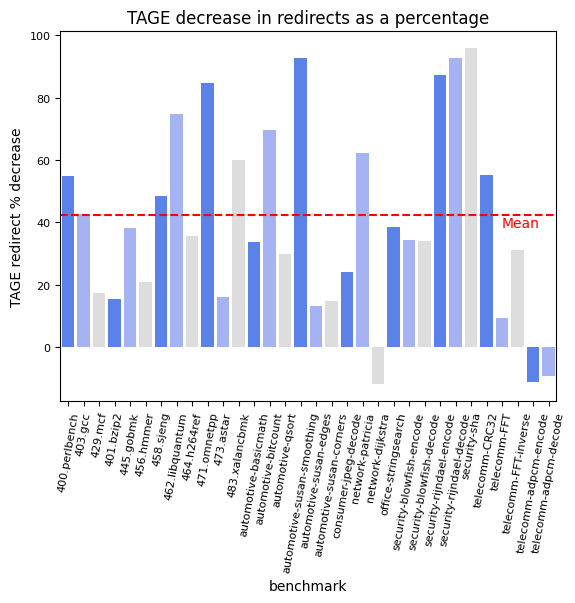

In [ ]:
fig, ax = plt.subplots()
plt.tick_params(axis='both', labelsize=8)
sns.barplot(data=df_synth, x="progname", y="branch_redirect", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.axhline(y=42.46, color="red", linestyle="--", label='Mean')
ax.set_title("TAGE decrease in redirects as a percentage")
ax.set_ylabel("TAGE redirect % decrease")
ax.set_xlabel("benchmark")
plt.text(x=28, y=42.46 - 4, s='Mean', color='red', fontsize=10)

<ipython-input-12-f1743891105e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_synth, x="progname", y="cycles", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-12-f1743891105e>:3: UserWarning: 
The palette list has fewer values (3) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_synth, x="progname", y="cycles", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-12-f1743891105e>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


Text(28, 2.7, 'Mean')

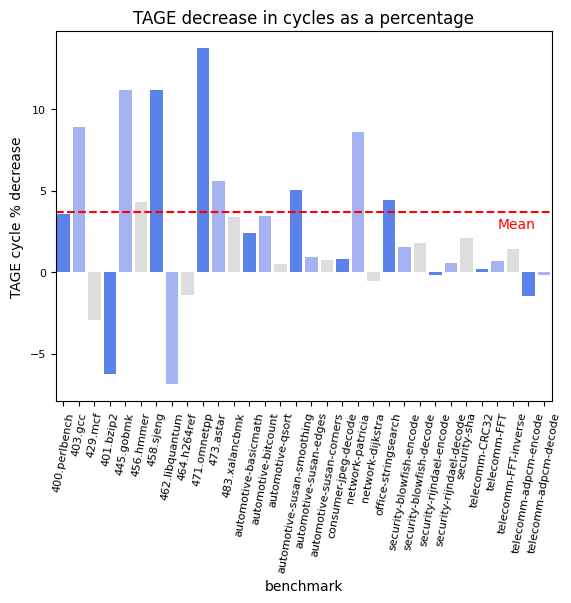

In [ ]:
fig, ax = plt.subplots()
plt.tick_params(axis='both', labelsize=8)
sns.barplot(data=df_synth, x="progname", y="cycles", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.axhline(y=3.7, color="red", linestyle="--", label='Mean')
ax.set_ylabel("TAGE cycle % decrease")
ax.set_xlabel("benchmark")
ax.set_title("TAGE decrease in cycles as a percentage")
plt.text(x=28, y=3.7 - 1, s='Mean', color='red', fontsize=10)

In [ ]:
df_synth2 = pandas.read_csv("Jenkins_TAGE - analysis_single3.csv")
df_synth2.columns = df_synth2.iloc[2]
df_synth2 = df_synth2.iloc[3:].drop(columns=["archname", "instructions"])
df_synth2 = df_synth2.iloc[:32]

df_synth2 = df_synth2.rename(columns={"jal": "branch_redirect", "jalr": "jump_redirect"})

df_synth2["branch_redirect"] = df_synth2["branch_redirect"].str.replace("%", '').astype(float)
df_synth2["cycles"] = df_synth2["cycles"].str.replace("%", '').astype(float)
df_synth2["branch_redirect"] = -df_synth2["branch_redirect"]
df_synth2["cycles"] = -df_synth2["cycles"]

df_synth2

2,progname,cycles,time,redirect,branch,branch_redirect,jump_redirect,trap,load_wait,cap_load_tag_set,...,dcache_load_miss_wait,dcache_store,dcache_store_miss,llcache_load_miss,llcache_load_miss_wait,tagcache_load,tagcache_load_miss,tagcache_store,tagcache_store_miss,tagcache_evict
3,400.perlbench,3.12,-3.12%,-100.00%,0.03%,40.47,-4.98%,-2.43%,0.57%,-0.41%,...,2.12%,0.10%,6.12%,-4.99%,-3.73%,#DIV/0!,#DIV/0!,0.15%,#DIV/0!,#DIV/0!
4,403.gcc,6.49,-6.49%,-100.00%,-0.12%,33.21,-8.56%,-6.07%,-1.50%,-1.81%,...,-1.26%,-1.44%,1.10%,-8.95%,-7.80%,#DIV/0!,#DIV/0!,-1.24%,#DIV/0!,#DIV/0!
5,429.mcf,2.71,-2.71%,-100.00%,-0.07%,16.51,-14.59%,-1.89%,-0.42%,-1.49%,...,-0.78%,-0.36%,1.39%,-4.23%,-4.12%,#DIV/0!,#DIV/0!,-0.91%,#DIV/0!,#DIV/0!
6,401.bzip2,1.14,-1.14%,-100.00%,-0.02%,10.52,-9.45%,-1.02%,0.30%,-1.27%,...,0.00%,-0.04%,-0.12%,-1.19%,-1.06%,#DIV/0!,#DIV/0!,-0.32%,#DIV/0!,#DIV/0!
7,445.gobmk,8.45,-8.45%,-100.00%,-0.16%,29.69,-20.39%,-8.03%,-1.85%,-2.56%,...,-1.65%,-0.86%,-2.15%,-7.55%,-5.80%,#DIV/0!,#DIV/0!,-0.58%,#DIV/0!,#DIV/0!
8,456.hmmer,4.00,-4.00%,-100.00%,-0.04%,18.50,-16.54%,-3.80%,-3.78%,-4.09%,...,-6.17%,1.90%,-0.66%,-4.39%,-4.00%,#DIV/0!,#DIV/0!,1.62%,#DIV/0!,#DIV/0!
9,458.sjeng,7.52,-7.52%,-100.00%,-0.08%,36.81,-6.24%,-6.94%,-0.88%,-2.11%,...,7.15%,-0.99%,19.40%,0.27%,0.06%,#DIV/0!,#DIV/0!,-0.11%,#DIV/0!,#DIV/0!
10,462.libquantum,0.72,-0.72%,-100.00%,0.01%,74.82,-4.15%,-0.71%,20.38%,-1.29%,...,22.69%,-1.53%,0.07%,19.78%,15.51%,#DIV/0!,#DIV/0!,-4.90%,#DIV/0!,#DIV/0!
11,464.h264ref,1.48,-1.48%,-100.00%,-0.02%,31.83,-7.81%,-1.32%,-30.89%,-0.47%,...,-1.10%,2.96%,-5.87%,-1.74%,-1.47%,#DIV/0!,#DIV/0!,-0.60%,#DIV/0!,#DIV/0!
12,471.omnetpp,9.86,-9.86%,-100.00%,-0.17%,77.09,-21.09%,-9.15%,0.92%,-1.66%,...,6.97%,-0.85%,13.51%,-44.37%,-40.03%,#DIV/0!,#DIV/0!,-1.53%,#DIV/0!,#DIV/0!


<ipython-input-16-570f4f392484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_synth2, x="progname", y="branch_redirect", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-16-570f4f392484>:3: UserWarning: 
The palette list has fewer values (3) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_synth2, x="progname", y="branch_redirect", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-16-570f4f392484>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


Text(28, 32, 'Mean')

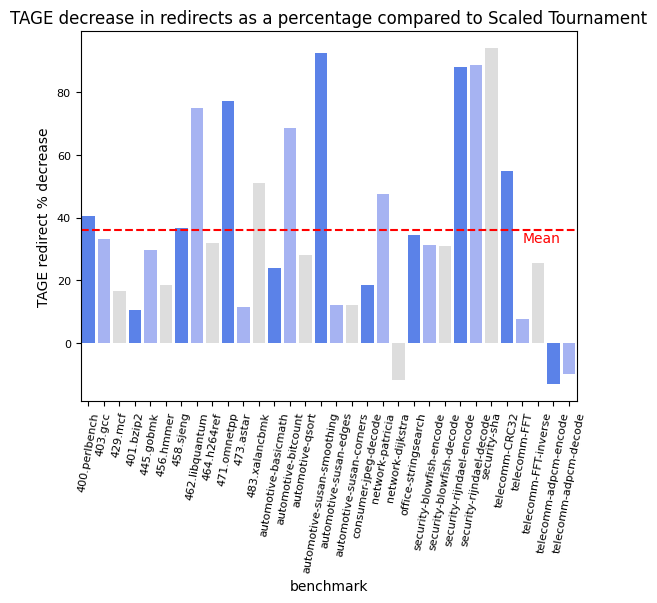

In [ ]:
fig, ax = plt.subplots()
plt.tick_params(axis='both', labelsize=8)
sns.barplot(data=df_synth2, x="progname", y="branch_redirect", palette=["#4477FF", "#99AAFF", "#DDDDDD"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.axhline(y=36, color="red", linestyle="--", label='Mean')
ax.set_title("TAGE decrease in redirects as a percentage compared to Scaled Tournament")
ax.set_ylabel("TAGE redirect % decrease")
ax.set_xlabel("benchmark")
plt.text(x=28, y=36 - 4, s='Mean', color='red', fontsize=10)

In [ ]:
def plot_c(ax, label, name, d, mean, x=26, y = 0.3, y2= -0.4, y_label="TAGE cycle % decrease"):
  plt.tick_params(axis='both', labelsize=8)
  sns.barplot(data=d, x="progname", y=label, palette=["#4477FF", "#99AAFF", "#DDDDDD"])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
  ax.axhline(y=mean, color="red", linestyle="--", label='Spe Mean')
  ax.set_ylabel(y_label)
  ax.set_xlabel("benchmark")
  ax.set_title(name)
  plt.text(x=x, y=mean + y, s='Spec Mean', color='red', fontsize=8)
  ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)

  for i, bar in enumerate(ax.patches):
      height = bar.get_height()
      offset = 0
      if(height < 0):
        offset = y2
      else:
        offset = 0.1
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          height + offset,
          f'{height:.2f}%',
          ha='center', va='bottom',
          fontsize=5.5
  )

<ipython-input-85-61d7e08e8a32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d, x="progname", y=label, palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-85-61d7e08e8a32>:3: UserWarning: 
The palette list has fewer values (3) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=d, x="progname", y=label, palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-85-61d7e08e8a32>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


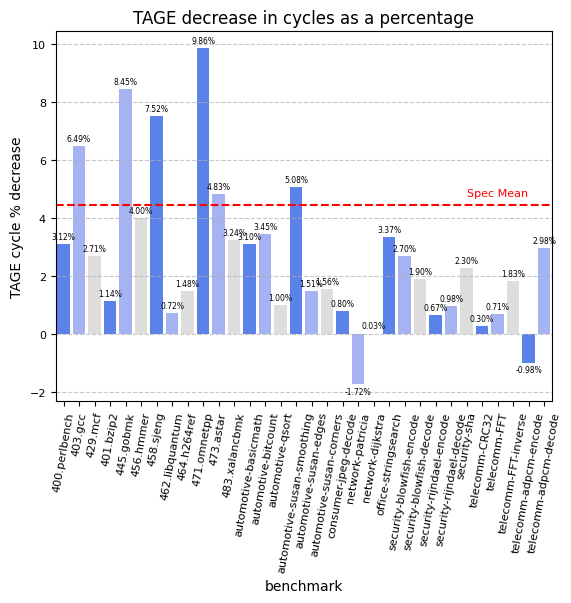

In [ ]:
fig, ax = plt.subplots()
plot_c(ax, "cycles", "TAGE decrease in cycles as a percentage", df_synth2, mean=4.46)

<ipython-input-91-b46e3b86f85a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d, x="progname", y=label, palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-91-b46e3b86f85a>:3: UserWarning: 
The palette list has fewer values (3) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=d, x="progname", y=label, palette=["#4477FF", "#99AAFF", "#DDDDDD"])
<ipython-input-91-b46e3b86f85a>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


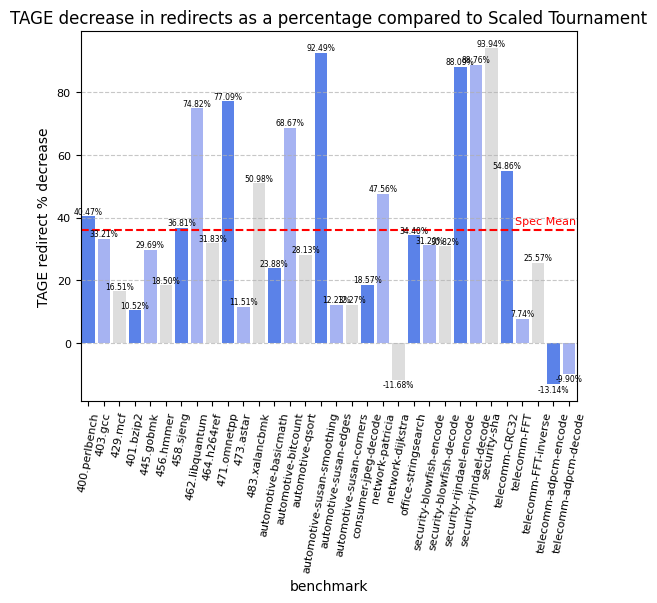

In [ ]:
fig, ax = plt.subplots()
plot_c(ax, "branch_redirect", "TAGE decrease in redirects as a percentage compared to Scaled Tournament", df_synth2, 36, x= 27.5, y = 1.8, y2=-3, y_label = "TAGE redirect % decrease")